# Librerías

In [ ]:
#Importamos librerías necesarias
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Preparación del entorno

In [ ]:
# Configurar para que TensorFlow utilice la GPU por defecto
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Configurar para que TensorFlow asigne memoria dinámicamente
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Especificar la GPU por defecto
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Manejar error
        print(e)

In [ ]:
!pip install -q gdown

In [ ]:
import gdown

# TP1-2-Dry-Bean-Dataset.zip
gdown.download('https://drive.google.com/uc?id=1SUwYRZ_6ZWEQQ7FJxniqQCrnHCsBlQcJ')

Downloading...
From: https://drive.google.com/uc?id=1SUwYRZ_6ZWEQQ7FJxniqQCrnHCsBlQcJ
To: /content/TP1-2-Dry-Bean-Dataset.zip
100%|██████████| 1.33M/1.33M [00:00<00:00, 121MB/s]


'TP1-2-Dry-Bean-Dataset.zip'

In [ ]:
import zipfile

with zipfile.ZipFile('TP1-2-Dry-Bean-Dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('./TP1-2')

In [ ]:
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('TP1-2/TP1-2-Dry-Bean-Dataset.csv')

# Analisis exploratorio y preprocesamiento de los datos

A continuación realizaremos el análisis exploratorio y preprocesamiento de los datos. Comenzaremos por familiarizarnos con las variables, analizando su distribución y tipo de datos y verificando la presencia de datos faltantes. También generaremos las nuevas columnas solicitadas para el trabajo.

In [ ]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,0.549812,28715,190.141097,0.763923,0.988856,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,0.411785,29172,191.272750,0.783968,0.984986,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,0.562727,29690,193.410904,0.778113,0.989559,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,0.498616,30724,195.467062,0.782681,0.976696,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,0.333680,30417,195.896503,0.773098,0.990893,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,0.750895,53768.200206,253.064220,0.749733,0.987143,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.092002,29774.915817,59.177120,0.049086,0.004660,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,0.218951,20684.000000,161.243764,0.555315,0.919246,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,0.715928,36714.500000,215.068003,0.718634,0.985670,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,0.764441,45178.000000,238.438026,0.759859,0.988283,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,0.810466,62294.000000,279.446467,0.786851,0.990013,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,0.911423,263261.000000,569.374358,0.866195,0.994677,0.987303,0.010451,0.003665,0.974767,0.999733


In [ ]:
df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [ ]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [ ]:
# Generamos columnas nuevas requeridas

df['AspectRatio'] = df['MajorAxisLength'] / df['MinorAxisLength']

df['Roundness'] = (4 * np.pi * df['Area']) / (df['Perimeter'] ** 2)

# Construcción del modelo

In [ ]:
# Dividimos los datos en X (variables predictoras) e y (variable objetivo)
X = df.drop('Class', axis=1)
y = df['Class']

# Convertimos la columna 'Class' a codificación one-hot
y_encoded = pd.get_dummies(y)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Normalizarmos los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Creamos el modelo de red neuronal
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(7, activation='softmax')
])

# Compilamos el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Definimos el callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenamos el modelo con EarlyStopping
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluamos el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/50
341/341 [==============================] - 2s 3ms/step - loss: 1.1275 - accuracy: 0.5451 - val_loss: 0.5982 - val_accuracy: 0.7929
Epoch 2/50
341/341 [==============================] - 1s 3ms/step - loss: 0.4096 - accuracy: 0.8808 - val_loss: 0.2983 - val_accuracy: 0.9027
Epoch 3/50
341/341 [==============================] - 1s 3ms/step - loss: 0.2655 - accuracy: 0.9128 - val_loss: 0.2439 - val_accuracy: 0.9133
Epoch 4/50
341/341 [==============================] - 1s 3ms/step - loss: 0.2357 - accuracy: 0.9183 - val_loss: 0.2266 - val_accuracy: 0.9141
Epoch 5/50
341/341 [==============================] - 1s 2ms/step - loss: 0.2242 - accuracy: 0.9231 - val_loss: 0.2200 - val_accuracy: 0.9185
Epoch 6/50
341/341 [==============================] - 1s 2ms/step - loss: 0.2186 - accuracy: 0.9226 - val_loss: 0.2144 - val_accuracy: 0.9221
Epoch 7/50
341/341 [==============================] - 1s 2ms/step - loss: 0.2132 - accuracy: 0.9237 - val_loss: 0.2096 - val_accuracy: 0.9218
Epoch 

Luego de probar con diferentes números de neuronas en las capas densas y viendo que al incrementar esos números las métricas no mejoraban, decidimos quedarnos con con la red mas chica. Aunque no era necesario en este caso, ya que es un entrenamiento rápido, colocamos un tope de que si no mejoran las métricas en tres epocas consecutivas, se detenga el entrenamiento.

# Gráficas

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 7)                 63        
                                                                 
Total params: 471 (1.84 KB)
Trainable params: 471 (1.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


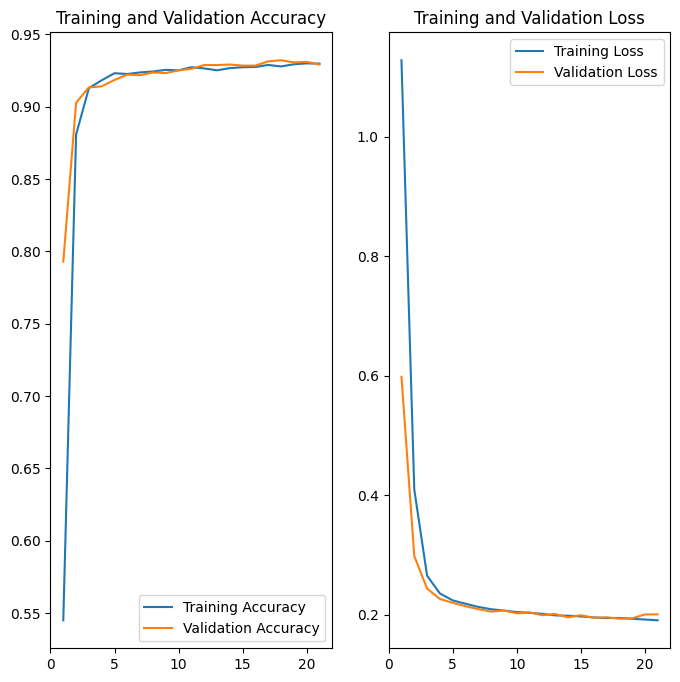

In [ ]:
# Grafica la precisión y pérdida de entrenamiento y validación
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

86/86 [==============================] - 0s 3ms/step


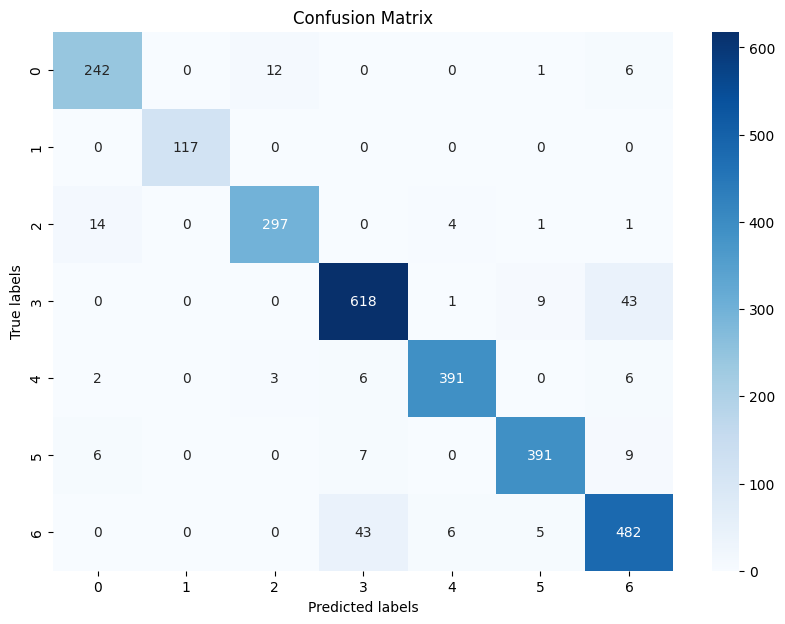

In [ ]:
# Obtener las predicciones del modelo en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Obtener las etiquetas reales en formato de clase simple
y_true = np.argmax(y_test.to_numpy(), axis=1)

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Crear un DataFrame de pandas a partir de la matriz de confusión
conf_matrix_df = pd.DataFrame(conf_matrix, index=range(7), columns=range(7))

# Crear la visualización utilizando seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


La matriz de confusión revela cómo el modelo de clasificación ha categorizado las muestras. Se observa que en general ha tenido un buen desempeño , con pocas muestras mal clasificadas. Las clasificaciones correctas se distribuyen uniformemente en la diagonal principal, lo que indica que el modelo ha acertado en la mayoría de las predicciones. Las desviaciones de la diagonal principal, que representan las clasificaciones incorrectas, son mínimas en comparación con el total de predicciones, lo que sugiere una alta capacidad de predicción del modelo.